In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [83]:
df = pd.read_csv("../input/adult-census-income/adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [85]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In this dataset we don't have any null values.

# EDA

<AxesSubplot:xlabel='count', ylabel='workclass'>

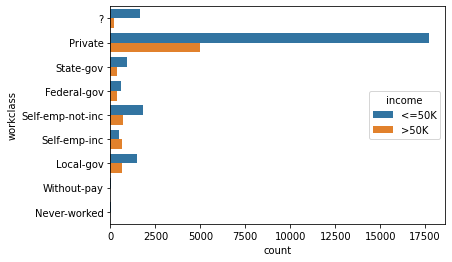

In [86]:
sns.countplot(y=df['workclass'], hue=df['income'])

According to this plot we can say that most of the people having salary less than 50k is from the private sector.

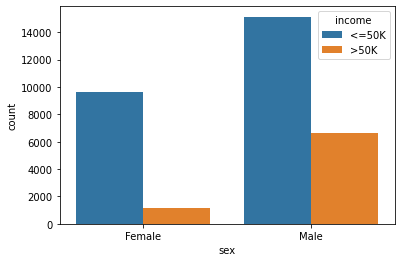

In [87]:
sns.countplot(df['sex'], hue=df['income']);

Here we see many things

    1- Most of the people from male and female are having salary less then 50k.
    2- In such ammount of people has salary more than 50k. In this Male people getting more salary from female.

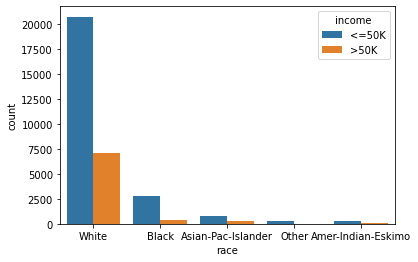

In [88]:
sns.countplot(x=df['race'], hue=df['income']);

White having more salary other than any of them.

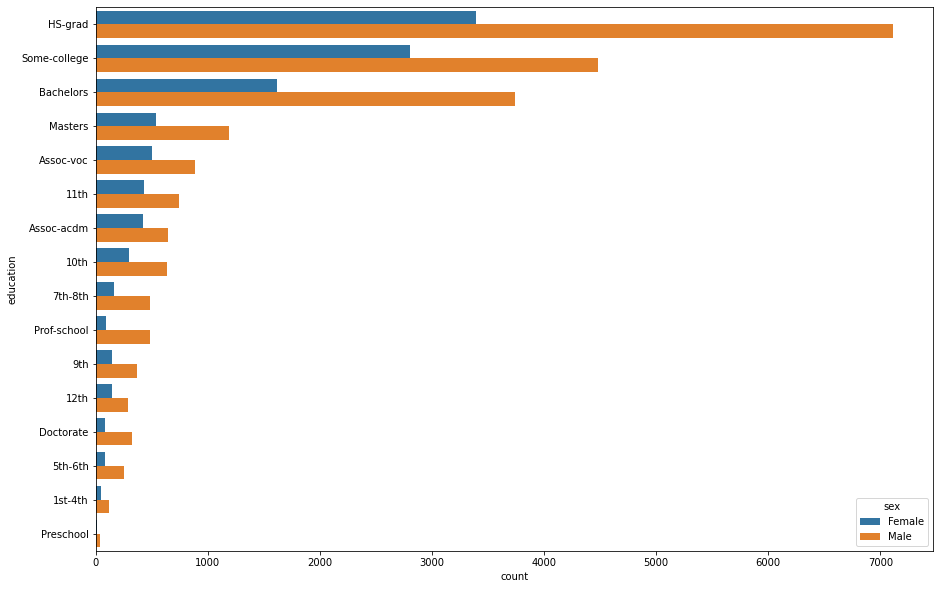

In [89]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y=df['education'], hue=df['sex'], order=df['education'].value_counts().index);

According to this plot we can see that females are more qualify than males.

<AxesSubplot:xlabel='count', ylabel='relationship'>

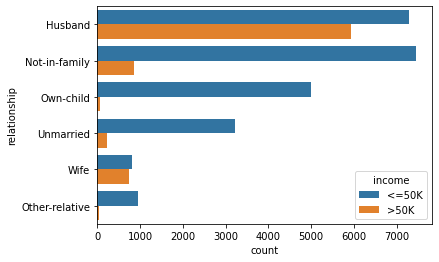

In [90]:
sns.countplot(y=df['relationship'], hue=df['income'], order = df['relationship'].value_counts().index)

Those are maried and husband having salary greater than 50k.

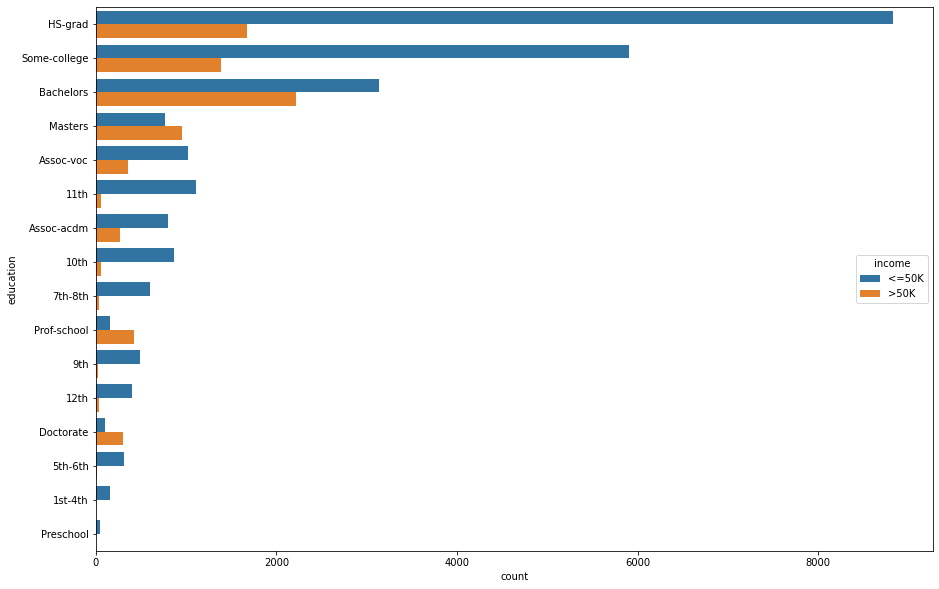

In [91]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y=df['education'], hue=df['income'], order = df['education'].value_counts().index);

Higher qualification having higher salary.

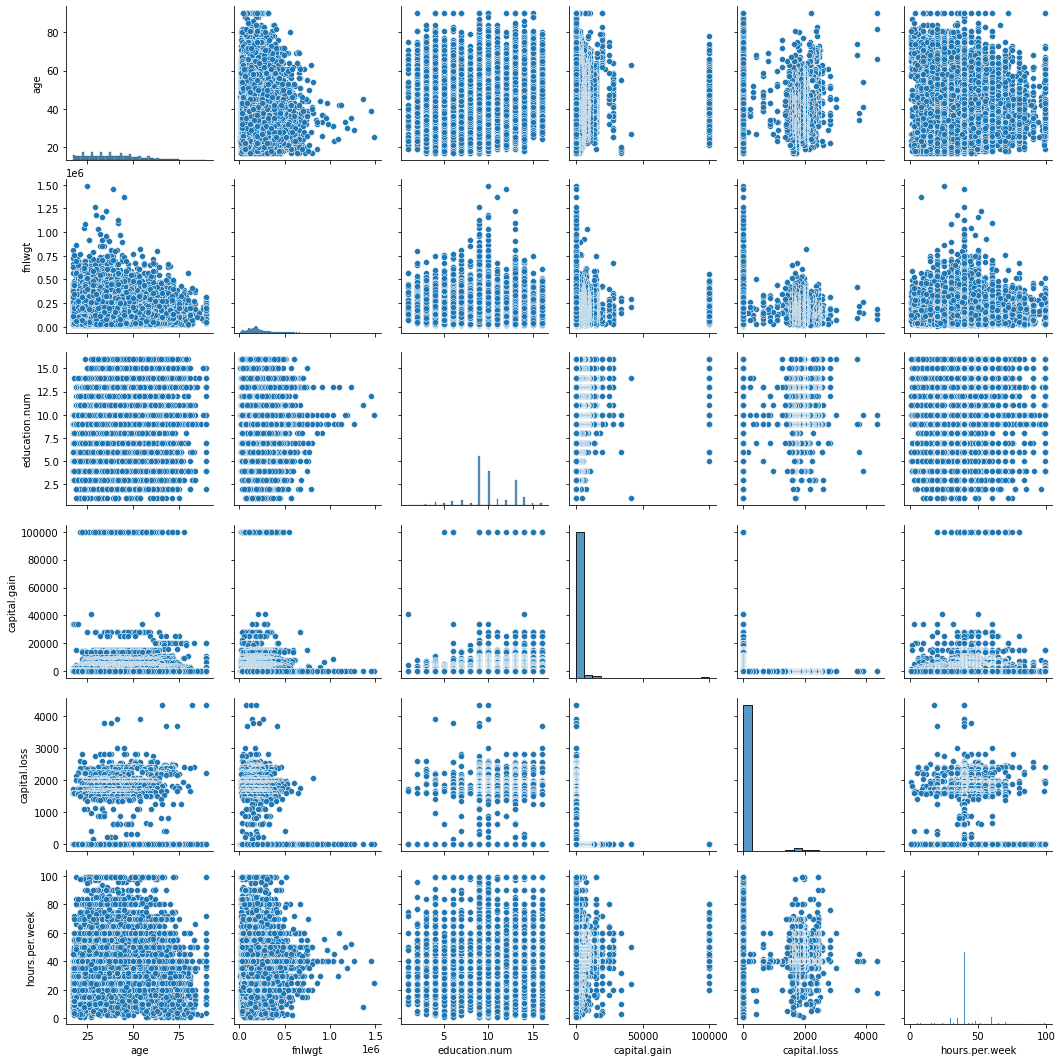

In [92]:
sns.pairplot(df)

# Checking Unique Values

In [93]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [94]:
df['workclass'] = df['workclass'].str.replace('?','Other')

In [95]:
df['workclass'].unique()

array(['Other', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [96]:
df["education"].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [97]:
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [98]:
df["occupation"].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [99]:
df['occupation'] = df['occupation'].str.replace('?','Other')

In [100]:
df['occupation'].unique()

array(['Other', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [101]:
df["relationship"].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [102]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [103]:
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [104]:
df["native.country"].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

# Data preprocessing and Feature Enginering

In [107]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [109]:
label_encoder=LabelEncoder()
df['income']=label_encoder.fit_transform(df['income'])
df['sex']=label_encoder.fit_transform(df['sex'])

In [111]:
df=pd.get_dummies(df,drop_first=True)
pd.set_option('display.max_columns',100)

In [112]:
df.head()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native.country_Cambodia,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,0,4356,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,0,4356,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,0,4356,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,0,3900,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [114]:
scaler = StandardScaler()
col = df[['age','fnlwgt','education.num','hours.per.week']]
col_scl = scaler.fit_transform(col)

col_scl = pd.DataFrame(col_scl,columns=col.columns)

df['age']=col_scl['age']
df['fnlwgt']=col_scl['fnlwgt']
df['education.num']=col_scl['education.num']
df['hours.per.week']=col_scl['hours.per.week']

In [116]:
X = df.drop(['income'],axis=1)
y = df['income']

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

## Logistic Regression

In [118]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("LR_Score :",lr.score(X_train,y_train))

LR_Score : 0.8461686117936118


## K-Nearest Neighbour Classifier

In [119]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN_Score :",knn.score(X_train,y_train))

KNN_Score : 0.8985334766584766


## Decision Tree Classifier

In [120]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("DT_Score :",dt.score(X_train,y_train))

DT_Score : 1.0


## Random Forest Classifier

In [121]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("RF_Score :",rf.score(X_train,y_train))

RF_Score : 1.0


## Ada-Boost Classifier

In [122]:
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
print("ADB_Score :",adb.score(X_train,y_train))

ADB_Score : 0.860411547911548


## Support Vector Machine

In [123]:
svm = SVC()
svm.fit(X_train,y_train)
print("SVM_Score :",svm.score(X_train,y_train))

SVM_Score : 0.8035933660933661


## Gradient Boost

In [124]:
gdboost = GradientBoostingClassifier()
gdboost.fit(X_train,y_train)
print("GDB_Score :",gdboost.score(X_train,y_train))

GDB_Score : 0.8702011670761671


## XGBoost

In [125]:
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)
print("XGB_Score :",xgboost.score(X_train,y_train))

XGB_Score : 0.9035242628992629


# Model Evaluation

In [126]:
lr_ypred = lr.predict(X_test)
knn_ypred = knn.predict(X_test)
dt_ypred = dt.predict(X_test)
rf_ypred = rf.predict(X_test)
adb_ypred = adb.predict(X_test)
svm_ypred = svm.predict(X_test)
gdboost_ypred = gdboost.predict(X_test)
xgboost_ypred = xgboost.predict(X_test)

### Confussion Matrix of Logistic Regression

In [127]:
lr_conf_mat = confusion_matrix(y_test,lr_ypred)
print("confusion_matrix for LR model",'\n',lr_conf_mat)

confusion_matrix for LR model 
 [[4590  339]
 [ 677  907]]


### Confussion Matrix of KNN

In [128]:
knn_conf_mat = confusion_matrix(y_test,knn_ypred)
print("confusion_matrix for KNN model",'\n',knn_conf_mat)

confusion_matrix for KNN model 
 [[4512  417]
 [ 526 1058]]


### Confussion Matrix of Disesion Tree Classifier

In [129]:
dt_conf_mat = confusion_matrix(y_test,dt_ypred)
print("confusion_matrix for DT model",'\n',dt_conf_mat)

confusion_matrix for DT model 
 [[4313  616]
 [ 621  963]]


### Confusion Matrix of Ransom Forest Classifier

In [130]:
rf_conf_mat = confusion_matrix(y_test,rf_ypred)
print("confusion_matrix for RF model",'\n',rf_conf_mat)

confusion_matrix for RF model 
 [[4582  347]
 [ 590  994]]


### Confusion Matrix of AdaBoost

In [131]:
adb_conf_mat = confusion_matrix(y_test,adb_ypred)
print("confusion_matrix for ADB model",'\n',adb_conf_mat)

confusion_matrix for ADB model 
 [[4641  288]
 [ 618  966]]


### Confusion Matrix of Support Vector Machine

In [132]:
svm_conf_mat = confusion_matrix(y_test,svm_ypred)
print("confusion_matrix for SVM model",'\n',svm_conf_mat)

confusion_matrix for SVM model 
 [[4778  151]
 [1169  415]]


### Confusion Matrix of Gradient Boost

In [133]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_ypred)
print("confusion_matrix for GDB model",'\n',gdboost_conf_mat)

confusion_matrix for GDB model 
 [[4696  233]
 [ 640  944]]


### Confusion Matrix of XGB

In [134]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_ypred)
print("confusion_matrix for XGB model",'\n',xgboost_conf_mat)

confusion_matrix for XGB model 
 [[4664  265]
 [ 563 1021]]


# Classification Report of All Models

In [135]:
lr_report = classification_report(y_test,lr_ypred)
print("LR classifiction_report :",'\n',lr_report)

LR classifiction_report : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4929
           1       0.73      0.57      0.64      1584

    accuracy                           0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [136]:
knn_report = classification_report(y_test,knn_ypred)
print("KNN classifiction_report :",'\n',knn_report)

KNN classifiction_report : 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4929
           1       0.72      0.67      0.69      1584

    accuracy                           0.86      6513
   macro avg       0.81      0.79      0.80      6513
weighted avg       0.85      0.86      0.85      6513



In [137]:
dt_report = classification_report(y_test,dt_ypred)
print("DT classifiction_report :",'\n',dt_report)

DT classifiction_report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4929
           1       0.61      0.61      0.61      1584

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [138]:
rf_report = classification_report(y_test,rf_ypred)
print("RF classifiction_report :",'\n',rf_report)

RF classifiction_report : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4929
           1       0.74      0.63      0.68      1584

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [139]:
adb_report = classification_report(y_test,adb_ypred)
print("ADB classifiction_report :",'\n',adb_report)

ADB classifiction_report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4929
           1       0.77      0.61      0.68      1584

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [140]:
svm_report = classification_report(y_test,svm_ypred)
print("SVM classifiction_report :",'\n',svm_report)

SVM classifiction_report : 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      4929
           1       0.73      0.26      0.39      1584

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.63      6513
weighted avg       0.79      0.80      0.76      6513



In [141]:
gdboost_report = classification_report(y_test,gdboost_ypred)
print("GDB classifiction_report :",'\n',gdboost_report)

GDB classifiction_report : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4929
           1       0.80      0.60      0.68      1584

    accuracy                           0.87      6513
   macro avg       0.84      0.77      0.80      6513
weighted avg       0.86      0.87      0.86      6513



In [142]:
xgboost_report = classification_report(y_test,xgboost_ypred)
print("XGB classifiction_report :",'\n',xgboost_report)

XGB classifiction_report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4929
           1       0.79      0.64      0.71      1584

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



# ROC and AUC Curve

In [143]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [144]:
print("Logistic Regression : ", roc_auc_score(y_test,lr.predict(X_test)))
print("KNN : ", roc_auc_score(y_test,knn.predict(X_test)))
print("Desision Tree : ", roc_auc_score(y_test,dt.predict(X_test)))
print("Random Forest : ", roc_auc_score(y_test,rf.predict(X_test)))
print("ABD : ", roc_auc_score(y_test,adb.predict(X_test)))
print("SVM : ", roc_auc_score(y_test,svm.predict(X_test)))
print("GDBoost : ", roc_auc_score(y_test,gdboost.predict(X_test)))
print("XGBoost : ", roc_auc_score(y_test,xgboost.predict(X_test)))

Logistic Regression :  0.751912190990858
KNN :  0.791663976957647
Desision Tree :  0.7414899527840795
Random Forest :  0.7785627885673534
ABD :  0.7757093915417105
SVM :  0.6156799661250361
GDBoost :  0.7743441720921941
XGBoost :  0.7954036331052461


# Checking Best Fit Model

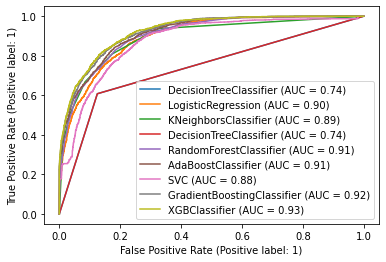

In [149]:
display = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn,X_test,y_test,ax=display.ax_)
plot_roc_curve(dt,X_test,y_test,ax=display.ax_)
plot_roc_curve(rf,X_test,y_test,ax=display.ax_)
plot_roc_curve(adb,X_test,y_test,ax=display.ax_)
plot_roc_curve(svm,X_test,y_test,ax=display.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=display.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=display.ax_)

#### Here Gradient Boosting and XGB Classifier giving best scores

# K-Fold Cross Validation

In [150]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=4,shuffle=True)
kf

KFold(n_splits=4, random_state=None, shuffle=True)

In [151]:
print("Mean of cross validation score of GBC :",cross_val_score(gdboost,X,y,cv=6).mean())
print("Mean of cross validation score of XGB :",cross_val_score(xgboost,X,y,cv=6).mean())

Mean of cross validation score of GBC : 0.8043064371706516
Mean of cross validation score of XGB : 0.8039073968913041


# Hyperparameter Tunning

In [152]:
from sklearn.model_selection import GridSearchCV
par_grid = {'max_depth' : [4,5],
           'learning_rate' : [0.1],
           'min_child_weight' : [1,2],
           'random_state' : [5,6]}
par_grid

{'max_depth': [4, 5],
 'learning_rate': [0.1],
 'min_child_weight': [1, 2],
 'random_state': [5, 6]}

In [153]:
grid_search = GridSearchCV(xgboost,param_grid = par_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

In [154]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 2,
 'random_state': 5}

In [155]:
xgboost_tuning=XGBClassifier(learning_rate=0.1,max_depth = 5,min_child_weight = 1,random_state = 5)
xgboost_tuning.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, ...)

In [156]:
xgboost_tuning_ypred = xgboost_tuning.predict(X_test)
xgboost_report = classification_report(y_test,xgboost_tuning_ypred)
print("XGBoost Classification report",'\n',xgboost_report)

XGBoost Classification report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4929
           1       0.81      0.62      0.70      1584

    accuracy                           0.87      6513
   macro avg       0.85      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



# After Hyperparameter Tunning We got Accuracy of 87%